In [1]:
import ROOT
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import tqdm
ROOT.ROOT.EnableImplicitMT()

if "/home/submit/pdmonte/CMSSW_10_6_27/src/Hrare2023/analysis/func_marti.so" not in ROOT.gSystem.GetLibraries():
    ROOT.gSystem.CompileMacro("/home/submit/pdmonte/CMSSW_10_6_27/src/Hrare2023/analysis/func_marti.cc","k")

Welcome to JupyROOT 6.28/00


In [32]:
date = "JUN07"

chainSGN = ROOT.TChain("events")
chainSGN.Add("/home/submit/pdmonte/CMSSW_10_6_27/src/Hrare2023/analysis/outputs/{0}/2018/outname_mc1040_GFcat_Phi3Cat_2018.root".format(date))
#chainSGN.Add("/home/submit/pdmonte/CMSSW_10_6_27/src/Hrare2023/analysis/outputs/{0}/2018/outname_mc1039_GFcat_D0StarCat_2018.root".format(date))

df = ROOT.RDataFrame(chainSGN)

(abs(goodPhotons_eta) < 1.4)
!(abs(goodPhotons_eta) < 1.4)


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


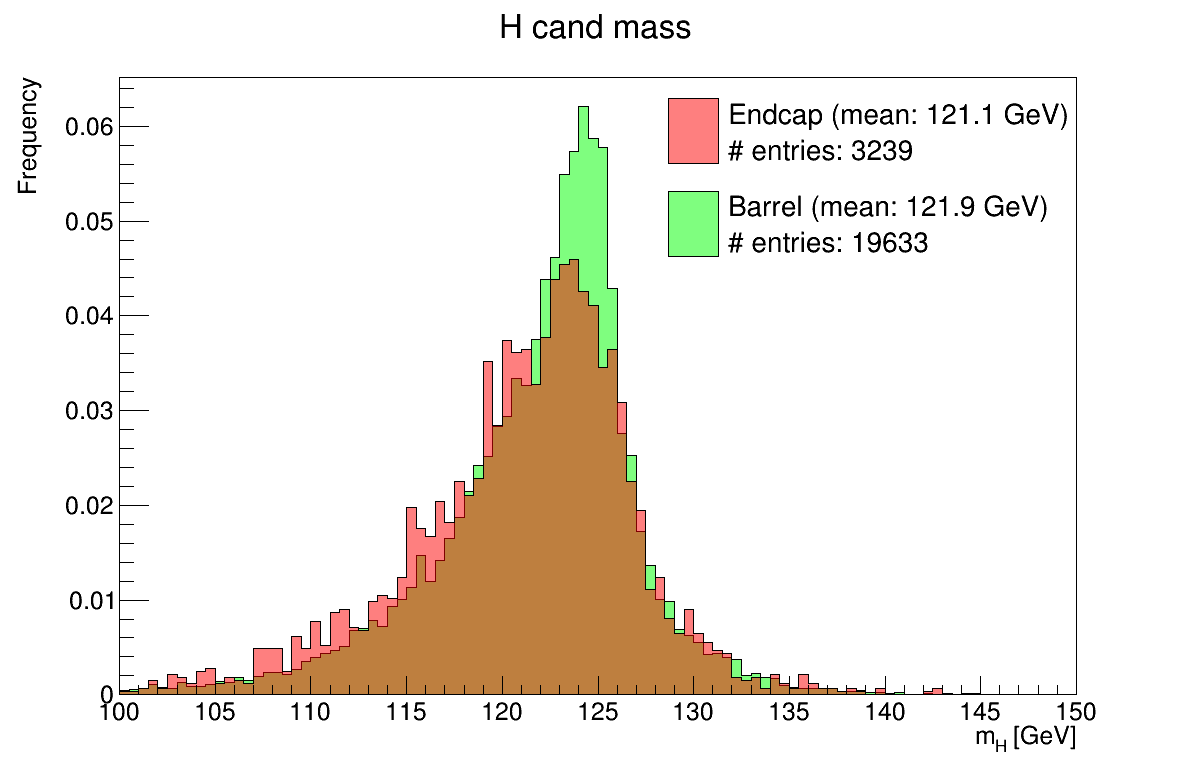

In [33]:
canvas = ROOT.TCanvas("canvas", "canvas", 1200, 800)

bins, xlow, xhigh = 100*1, 100, 150

filt = "(abs(goodPhotons_eta) < 1.4)"
nofilt = "!" + filt

print(filt)
print(nofilt)

#Kinematic Mass
hgood=df.Define("scale", "w*lumiIntegrated")\
    .Define("filter", filt)\
    .Filter("Sum(filter)>0")\
    .Histo1D(("hist", "#phi kinematic mass", bins, xlow, xhigh),"HCandMass")
hbad=df.Define("scale", "w*lumiIntegrated")\
    .Define("filter", nofilt)\
    .Filter("Sum(filter)>0")\
    .Histo1D(("hist", "#phi kinematic mass", bins, xlow, xhigh),"HCandMass")

hbad.SetFillColorAlpha(ROOT.kRed, 0.5)
hbad.SetLineColor(ROOT.kBlack)
hgood.SetFillColorAlpha(ROOT.kGreen, 0.5)
hgood.SetLineColor(ROOT.kBlack)

hbad.Scale(1/hbad.GetEntries())
hgood.Scale(1/hgood.GetEntries())


stack = ROOT.THStack("stack", "H cand mass")
stack.Add(hgood.GetValue())
stack.Add(hbad.GetValue())
stack.Draw("hist nostack")
stack.GetXaxis().SetTitle("m_{H} [GeV]")
stack.GetYaxis().SetTitle("Frequency")

legend = ROOT.TLegend(0.55, 0.65, 0.9, 0.89)
legend.SetMargin(0.17)
legend.SetBorderSize(0)
legend.SetTextSize(0.04)
legend.AddEntry(hbad.GetValue(), "#splitline{{Endcap (mean: {:.1f} GeV)}}{{# entries: {:.0f}}}".format(round(hbad.GetMean(), 1), round(hbad.GetEntries(), 0)), "f")
legend.AddEntry(hgood.GetValue(), "#splitline{{Barrel (mean: {:.1f} GeV)}}{{# entries: {:.0f}}}".format(round(hgood.GetMean(), 1), round(hgood.GetEntries(), 0)), "f")
legend.Draw()

canvas.Draw()
